In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

/home/akhil/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('cleaned_data.csv', index_col=False)

In [3]:
df.head()

,Unnamed: 0,iyear,imonth,iday,extended,country,region,provstate,city,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,natlty1,gname,individual,weaptype1,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,ishostkid,ransom
0,0,1970,7,2,0,58,2,1565,32086,1,0,1,1,1,0,0,1,0,1,14,58,1944,0,13,0,0,0,0,0,0,3,0,0
1,1,1970,0,0,0,130,1,701,23921,1,0,1,1,1,0,0,1,0,6,7,21,13,0,13,0,0,0,0,0,0,3,1,1
2,2,1970,1,0,0,160,5,2263,37186,4,0,1,1,1,0,0,1,0,1,10,217,3485,0,13,0,0,0,0,0,0,3,0,0
3,3,1970,1,0,0,78,8,158,2765,1,0,1,1,1,0,0,1,0,3,7,217,3485,0,6,0,0,0,0,0,1,3,0,0
4,4,1970,1,0,0,101,4,725,12139,1,0,1,1,1,-9,0,1,0,7,7,217,3485,0,8,0,0,0,0,0,1,3,0,0


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'provstate',
       'city', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'natlty1', 'gname', 'individual', 'weaptype1', 'nkillus',
       'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'ishostkid', 'ransom'],
      dtype='object')

In [6]:
# plt.figure(figsize=(30, 30))
# sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = df.drop(['attacktype1'], axis=1)
y = df['attacktype1']

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [10]:
print(model.feature_importances_)


[0.06194702 0.03062364 0.03327225 0.05287809 0.02685278 0.03137414
 0.03091195 0.03064716 0.01216785 0.00503538 0.00270717 0.00126152
 0.01131752 0.01547076 0.00874417 0.01406958 0.01179791 0.05027967
 0.02374858 0.02949843 0.00100594 0.35736841 0.00081769 0.00756162
 0.02559604 0.00064329 0.00261178 0.06613    0.00760284 0.04166399
 0.00439281]


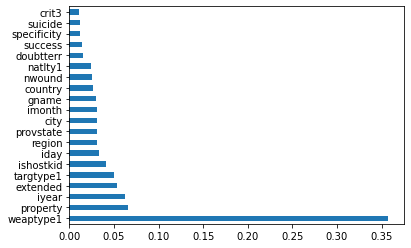

In [11]:
#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [12]:
len(df.iyear.value_counts())

48

In [13]:
X = df[['weaptype1','property','iyear','extended','targtype1','ishostkid',
      'iday', 'provstate','city','imonth','region','gname','country', 'nwound',
      'natlty1', 'doubtterr', 'success','suicide']]

y = df['attacktype1']


In [14]:
from collections import Counter
counter=Counter(y)
counter

Counter({1: 20117,
         6: 12138,
         3: 91842,
         7: 11017,
         2: 45251,
         4: 688,
         9: 8267,
         8: 1096,
         5: 1048})

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
y_pred = rf.predict(X_test)

In [18]:
y_pred

array([3, 3, 2, ..., 2, 2, 3])

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
acc

0.9184968532107696

In [20]:
pre = confusion_matrix(y_test, y_pred)
pre

array([[ 2933,   658,   308,     0,     2,    54,    23,     3,    48],
       [  289,  7941,   353,     1,     8,    58,   177,    16,    15],
       [   57,   163, 18136,     1,     7,    12,    29,     3,    39],
       [   13,    21,     4,    34,     8,    58,     8,     0,     6],
       [    2,    26,     3,     2,   111,    82,     2,     0,     8],
       [   24,    33,     1,     4,    13,  2390,     2,     0,    12],
       [    7,   213,     4,     0,     0,     7,  1900,     6,    52],
       [   13,    52,     4,     0,     0,     0,    22,   109,     0],
       [   40,     2,     3,     0,     0,     5,    35,     0,  1618]])

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.73      0.79      4029
           2       0.87      0.90      0.88      8858
           3       0.96      0.98      0.97     18447
           4       0.81      0.22      0.35       152
           5       0.74      0.47      0.58       236
           6       0.90      0.96      0.93      2479
           7       0.86      0.87      0.87      2189
           8       0.80      0.55      0.65       200
           9       0.90      0.95      0.92      1703

    accuracy                           0.92     38293
   macro avg       0.86      0.74      0.77     38293
weighted avg       0.92      0.92      0.92     38293



In [22]:
# import pickle

# Pkl_Filename = "Pickle_RL_Model.pkl"  

# with open(Pkl_Filename, 'wb') as file:  
#     pickle.dump(rf, file)


In [23]:
# score = Pickled_RF_Model.score(X_test, y_test)  
# # Print the Score
# print("Test score: {0:.2f} %".format(100 * score))  

# # Predict the Labels using the reloaded Model
# Ypredict = Pickled_RF_Model.predict(X_test)  

# Ypredict

In [24]:
# 'weaptype1','property','iyear','extended','targtype1','ishostkid',
#       'iday', 'provstate','city','imonth','region','gname','country', 'nwound',
#       'natlty1', 'doubtterr', 'success','suicide'

In [25]:
# y_pred

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = rf.predict(X_test)
dtree_pred

array([3, 3, 2, ..., 2, 2, 3])

In [27]:
acc = accuracy_score(y_test, dtree_pred)
acc

0.9184968532107696

In [28]:
conf_matrix = confusion_matrix(y_test, dtree_pred)
conf_matrix

array([[ 2933,   658,   308,     0,     2,    54,    23,     3,    48],
       [  289,  7941,   353,     1,     8,    58,   177,    16,    15],
       [   57,   163, 18136,     1,     7,    12,    29,     3,    39],
       [   13,    21,     4,    34,     8,    58,     8,     0,     6],
       [    2,    26,     3,     2,   111,    82,     2,     0,     8],
       [   24,    33,     1,     4,    13,  2390,     2,     0,    12],
       [    7,   213,     4,     0,     0,     7,  1900,     6,    52],
       [   13,    52,     4,     0,     0,     0,    22,   109,     0],
       [   40,     2,     3,     0,     0,     5,    35,     0,  1618]])

In [29]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           1       0.87      0.73      0.79      4029
           2       0.87      0.90      0.88      8858
           3       0.96      0.98      0.97     18447
           4       0.81      0.22      0.35       152
           5       0.74      0.47      0.58       236
           6       0.90      0.96      0.93      2479
           7       0.86      0.87      0.87      2189
           8       0.80      0.55      0.65       200
           9       0.90      0.95      0.92      1703

    accuracy                           0.92     38293
   macro avg       0.86      0.74      0.77     38293
weighted avg       0.92      0.92      0.92     38293



In [30]:
import xgboost as xgb

xg_boost = xgb.XGBRFClassifier() 
xg_boost.fit(X_train, y_train)
xgb_pred = xg_boost.predict(X_test)
xgb_pred

array([3, 3, 2, ..., 2, 2, 3])

In [31]:
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_acc

0.8930352805995874

In [32]:
import pickle

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf, file)

In [33]:
# Load the Model back from file

with open(Pkl_Filename, 'rb') as file:  
    Pickled_RF_Model = pickle.load(file)

Pickled_RF_Model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
y_pred = Pickled_RF_Model.predict([[6,1,2021,1,13,1,15,1565,32086,12,179,1944,
                                   58,0,58,0,1,1]])

In [35]:
def predict(text):
    if text == 1:
        return 'Assassination'
    elif text == 2:
        return 'Armed assault'
    elif text == 3:
        return 'Bombing/explosion'
    elif text == 4:
        return 'Hijacking'
    elif text == 5:
        return 'Hostage taking (barricade incident)'
    elif text == 6:
        return 'Hostage taking (kidnapping)'
    elif text == 7:
        return 'Facility/infrastructure attack'
    elif text == 8:
        return 'Unarmed assaults'
    else:
        return 'Unknown'
    
print("The Terrorist Activity Type is : ", predict(y_pred))

The Terrorist Activity Type is :  Hostage taking (kidnapping)
